In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\HP\Documents\Datasets\india_electricity_bill_100k_dirty.csv")

In [5]:
df

,fan,refrigerator,ac,lights,others,state,electricity_company,electricity_bill
0,3.7,19.9,17.4,3.6,0.8,Gujarat,PGVCL,119.48
1,19.2,13.1,7.4,9.0,5.0,Maharashtra,MSEDCL,84.65
2,21.4,21.7,7.6,7.0,0.2,Rajasthan,NaN,45.65
3,6.1,16.6,2.8,3.6,6.1,Karnataka,BESCOM,30.15
4,10.3,15.4,3.3,3.1,1.8,Gujarat,UGVCL,32.80
...,...,...,...,...,...,...,...,...
99995,0.7,16.9,4.6,10.4,7.2,Karnataka,MESCOM,58.78
99996,22.3,17.0,2.8,4.5,3.4,Maharashtra,Tata Power Mumbai,85.62
99997,6.6,22.9,7.8,8.4,6.1,Haryana,DHBVN,101.96
99998,0.5,18.2,0.5,4.1,4.7,Maharashtra,MSEDCL,48.45


In [6]:
df.isna().sum()

fan                     2000
refrigerator            2000
ac                      2000
lights                  2000
others                  2000
state                   2000
electricity_company     2000
electricity_bill       13072
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,fan,refrigerator,ac,lights,others,electricity_bill
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,86928.000000
mean,12.024249,18.007483,9.052769,6.005666,5.001902,174.310061
std,6.973882,3.524711,5.298408,3.455125,2.891433,1099.459924
min,-4.900000,0.100000,0.000000,0.000000,0.000000,-498.380000
25%,6.000000,15.000000,4.500000,3.000000,2.500000,56.970000
50%,12.000000,18.000000,9.000000,6.000000,5.000000,88.420000
75%,18.000000,21.000000,13.500000,9.000000,7.500000,121.002500
max,39.800000,40.000000,30.000000,12.000000,10.000000,19976.090000


In [9]:
df.dtypes

fan                    float64
refrigerator           float64
ac                     float64
lights                 float64
others                 float64
state                   object
electricity_company     object
electricity_bill       float64
dtype: object

In [10]:
num_cols = ["fan", "refrigerator", "ac", "lights", "others", 'electricity_bill']

In [11]:
df[(df[num_cols] < 0).any(axis=1)]

,fan,refrigerator,ac,lights,others,state,electricity_company,electricity_bill
145,16.8,22.6,7.8,2.8,8.6,Haryana,UHBVN,-452.61
215,3.3,16.3,1.2,3.8,0.2,Haryana,NaN,-11.69
235,2.1,17.1,2.9,2.7,3.1,Karnataka,MESCOM,-96.06
244,0.1,19.9,12.2,8.2,9.3,Tamil Nadu,TANGEDCO,-130.51
288,22.9,20.1,15.8,10.7,2.2,Haryana,UHBVN,-17.12
...,...,...,...,...,...,...,...,...
99356,4.1,21.9,0.6,9.6,6.3,Haryana,UHBVN,-28.40
99455,17.2,12.7,3.1,3.1,4.5,Uttar Pradesh,UPPCL,-0.08
99696,5.0,21.4,2.4,1.5,8.2,Gujarat,UGVCL,-6.70
99758,23.3,19.2,0.6,2.7,1.1,Bihar,SBPDCL,-12.19


In [12]:
rows_with_negatives = (df[num_cols] < 0).any(axis=1)

df_cleaned = df[~rows_with_negatives]

print(f"Shape of DataFrame after dropping negative values: {df_cleaned.shape}")
display(df_cleaned.head())

Shape of DataFrame after dropping negative values: (99093, 8)


,fan,refrigerator,ac,lights,others,state,electricity_company,electricity_bill
0,3.7,19.9,17.4,3.6,0.8,Gujarat,PGVCL,119.48
1,19.2,13.1,7.4,9.0,5.0,Maharashtra,MSEDCL,84.65
2,21.4,21.7,7.6,7.0,0.2,Rajasthan,NaN,45.65
3,6.1,16.6,2.8,3.6,6.1,Karnataka,BESCOM,30.15
4,10.3,15.4,3.3,3.1,1.8,Gujarat,UGVCL,32.80


In [13]:
del num_cols, df, rows_with_negatives

In [14]:
df_cleaned.isna().sum()

fan                     1992
refrigerator            1992
ac                      1997
lights                  1997
others                  1995
state                   1993
electricity_company     1980
electricity_bill       13067
dtype: int64

In [15]:
df_cleaned.dropna(subset=['electricity_company'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\4101931330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(subset=['electricity_company'], inplace=True)


In [16]:
df_cleaned

,fan,refrigerator,ac,lights,others,state,electricity_company,electricity_bill
0,3.7,19.9,17.4,3.6,0.8,Gujarat,PGVCL,119.48
1,19.2,13.1,7.4,9.0,5.0,Maharashtra,MSEDCL,84.65
3,6.1,16.6,2.8,3.6,6.1,Karnataka,BESCOM,30.15
4,10.3,15.4,3.3,3.1,1.8,Gujarat,UGVCL,32.80
5,7.4,15.3,11.0,11.5,8.7,Bihar,SBPDCL,101.08
...,...,...,...,...,...,...,...,...
99995,0.7,16.9,4.6,10.4,7.2,Karnataka,MESCOM,58.78
99996,22.3,17.0,2.8,4.5,3.4,Maharashtra,Tata Power Mumbai,85.62
99997,6.6,22.9,7.8,8.4,6.1,Haryana,DHBVN,101.96
99998,0.5,18.2,0.5,4.1,4.7,Maharashtra,MSEDCL,48.45


In [17]:
for col in ['fan', 'refrigerator', 'ac', 'lights', 'others', 'electricity_bill']:
    if df_cleaned[col].isnull().any():
        df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\4216175582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)


In [18]:
df_cleaned.isna().sum()

fan                       0
refrigerator              0
ac                        0
lights                    0
others                    0
state                  1955
electricity_company       0
electricity_bill          0
dtype: int64

In [19]:
df_cleaned.dropna(subset="state" , inplace =True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\4139106908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(subset="state" , inplace =True)


In [20]:
df_cleaned

,fan,refrigerator,ac,lights,others,state,electricity_company,electricity_bill
0,3.7,19.9,17.4,3.6,0.8,Gujarat,PGVCL,119.48
1,19.2,13.1,7.4,9.0,5.0,Maharashtra,MSEDCL,84.65
3,6.1,16.6,2.8,3.6,6.1,Karnataka,BESCOM,30.15
4,10.3,15.4,3.3,3.1,1.8,Gujarat,UGVCL,32.80
5,7.4,15.3,11.0,11.5,8.7,Bihar,SBPDCL,101.08
...,...,...,...,...,...,...,...,...
99995,0.7,16.9,4.6,10.4,7.2,Karnataka,MESCOM,58.78
99996,22.3,17.0,2.8,4.5,3.4,Maharashtra,Tata Power Mumbai,85.62
99997,6.6,22.9,7.8,8.4,6.1,Haryana,DHBVN,101.96
99998,0.5,18.2,0.5,4.1,4.7,Maharashtra,MSEDCL,48.45


In [21]:
df_cleaned.isna().sum()

fan                    0
refrigerator           0
ac                     0
lights                 0
others                 0
state                  0
electricity_company    0
electricity_bill       0
dtype: int64

In [22]:
df_cleaned.duplicated().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x25fe5c2ecd0>,
 'caps': [<matplotlib.lines.Line2D at 0x25fe5c40550>,
 'boxes': [<matplotlib.lines.Line2D at 0x25fd4ba5290>],
 'medians': [<matplotlib.lines.Line2D at 0x25fe5c41c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x25fe5c426d0>],
 'means': []}

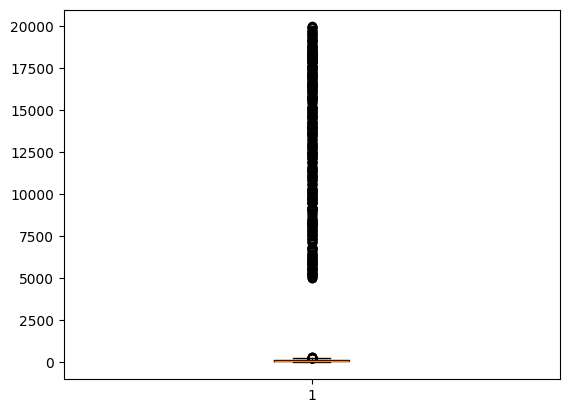

In [23]:
plt.boxplot(df_cleaned['electricity_bill'])

In [24]:
extreme = df_cleaned[df_cleaned['electricity_bill']>5000]

In [25]:
extreme

,fan,refrigerator,ac,lights,others,state,electricity_company,electricity_bill
144,12.2,12.0,1.100000,2.6,8.900000,Haryana,UHBVN,12848.25
214,12.4,13.9,5.000000,9.4,9.400000,Punjab,PSPCL,11905.25
484,22.2,15.1,16.700000,1.0,8.900000,Rajasthan,AVVNL,16626.47
851,18.2,22.3,14.200000,6.4,2.000000,Maharashtra,Tata Power Mumbai,13791.19
1965,3.2,15.4,3.800000,9.4,8.000000,Rajasthan,JVVNL,6294.12
...,...,...,...,...,...,...,...,...
98937,7.4,19.2,9.600000,6.9,5.009391,Gujarat,PGVCL,6113.32
99106,17.9,21.1,9.112219,3.6,8.700000,Bihar,NBPDCL,13945.48
99208,12.8,16.9,14.900000,1.7,2.100000,Haryana,UHBVN,9792.92
99282,9.8,13.1,4.000000,8.4,4.600000,Haryana,DHBVN,9109.75


In [26]:
df_cleaned.drop(extreme.index, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\2989927127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(extreme.index, inplace=True)


{'whiskers': [<matplotlib.lines.Line2D at 0x25fe5cd3890>,
 'caps': [<matplotlib.lines.Line2D at 0x25fe5ce1250>,
 'boxes': [<matplotlib.lines.Line2D at 0x25fe5cd2bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x25fe5ce27d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25fe5ce3210>],
 'means': []}

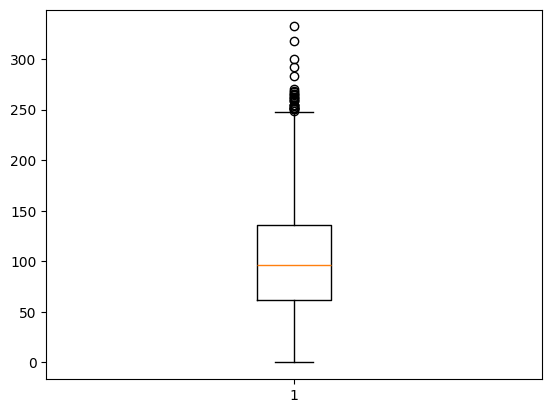

In [27]:
plt.boxplot(df_cleaned['electricity_bill'])

In [28]:
del extreme

<Axes: >

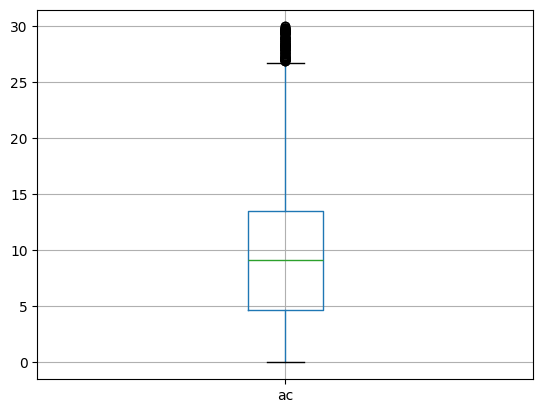

In [29]:
df_cleaned.boxplot(column=['ac'])

In [30]:
df_cleaned.describe()

,fan,refrigerator,ac,lights,others,electricity_bill
count,94594.000000,94594.000000,94594.000000,94594.000000,94594.000000,94594.000000
mean,12.046096,18.018721,9.113640,6.007461,5.010208,100.371664
std,6.898563,3.488024,5.225238,3.421836,2.860918,48.724227
min,0.000000,0.100000,0.000000,0.000000,0.000000,-0.000000
25%,6.100000,15.100000,4.700000,3.100000,2.600000,61.892500
50%,12.045820,18.017840,9.112219,6.007829,5.009391,96.540000
75%,17.900000,21.000000,13.500000,8.900000,7.500000,136.330000
max,39.800000,40.000000,30.000000,12.000000,10.000000,332.130000


In [31]:
df_cleaned

,fan,refrigerator,ac,lights,others,state,electricity_company,electricity_bill
0,3.7,19.9,17.4,3.6,0.8,Gujarat,PGVCL,119.48
1,19.2,13.1,7.4,9.0,5.0,Maharashtra,MSEDCL,84.65
3,6.1,16.6,2.8,3.6,6.1,Karnataka,BESCOM,30.15
4,10.3,15.4,3.3,3.1,1.8,Gujarat,UGVCL,32.80
5,7.4,15.3,11.0,11.5,8.7,Bihar,SBPDCL,101.08
...,...,...,...,...,...,...,...,...
99995,0.7,16.9,4.6,10.4,7.2,Karnataka,MESCOM,58.78
99996,22.3,17.0,2.8,4.5,3.4,Maharashtra,Tata Power Mumbai,85.62
99997,6.6,22.9,7.8,8.4,6.1,Haryana,DHBVN,101.96
99998,0.5,18.2,0.5,4.1,4.7,Maharashtra,MSEDCL,48.45


In [32]:
df_cleaned["overuse"] = (df_cleaned["electricity_bill"] > 80).astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1951392284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["overuse"] = (df_cleaned["electricity_bill"] > 80).astype(int)


In [33]:
df_cleaned

,fan,refrigerator,ac,lights,others,state,electricity_company,electricity_bill,overuse
0,3.7,19.9,17.4,3.6,0.8,Gujarat,PGVCL,119.48,1
1,19.2,13.1,7.4,9.0,5.0,Maharashtra,MSEDCL,84.65,1
3,6.1,16.6,2.8,3.6,6.1,Karnataka,BESCOM,30.15,0
4,10.3,15.4,3.3,3.1,1.8,Gujarat,UGVCL,32.80,0
5,7.4,15.3,11.0,11.5,8.7,Bihar,SBPDCL,101.08,1
...,...,...,...,...,...,...,...,...,...
99995,0.7,16.9,4.6,10.4,7.2,Karnataka,MESCOM,58.78,0
99996,22.3,17.0,2.8,4.5,3.4,Maharashtra,Tata Power Mumbai,85.62,1
99997,6.6,22.9,7.8,8.4,6.1,Haryana,DHBVN,101.96,1
99998,0.5,18.2,0.5,4.1,4.7,Maharashtra,MSEDCL,48.45,0


In [34]:
df_cleaned["state"].value_counts()

state
Gujarat          9603
Bihar            9555
Tamil Nadu       9538
Karnataka        9445
Punjab           9445
Rajasthan        9417
Maharashtra      8997
Delhi            8950
Haryana          8939
Uttar Pradesh    8799
UP                494
maharastra        488
delhi             470
Hariyana          454
Name: count, dtype: int64

In [35]:
df_cleaned.replace("UP" ,"Uttar Pradesh" , inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1609528445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.replace("UP" ,"Uttar Pradesh" , inplace=True)


In [36]:
df_cleaned["state"].value_counts()

state
Gujarat          9603
Bihar            9555
Tamil Nadu       9538
Karnataka        9445
Punjab           9445
Rajasthan        9417
Uttar Pradesh    9293
Maharashtra      8997
Delhi            8950
Haryana          8939
maharastra        488
delhi             470
Hariyana          454
Name: count, dtype: int64

In [37]:
rep = ["maharastra" , "delhi" , "Hariyana"]
torep = {"Delhi" : "delhi" , "Hariyana" : "Haryana" , "Maharashtra" : "maharastra"}

df_cleaned.replace(rep , torep , inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1892555348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.replace(rep , torep , inplace=True)


In [93]:
df_cleaned.replace("Hariyana", "Haryana" , inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\888176342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.replace("Hariyana", "Haryana" , inplace=True)


In [94]:
df_cleaned["state"].value_counts()

state
Gujarat          9603
Bihar            9555
Tamil Nadu       9538
Maharashtra      9451
Karnataka        9445
Punjab           9445
Delhi            9438
Rajasthan        9417
Haryana          9409
Uttar Pradesh    9293
Name: count, dtype: int64

In [39]:
del rep, torep

In [40]:
df_cleaned

,fan,refrigerator,ac,lights,others,state,electricity_company,electricity_bill,overuse
0,3.7,19.9,17.4,3.6,0.8,Gujarat,PGVCL,119.48,1
1,19.2,13.1,7.4,9.0,5.0,Maharashtra,MSEDCL,84.65,1
3,6.1,16.6,2.8,3.6,6.1,Karnataka,BESCOM,30.15,0
4,10.3,15.4,3.3,3.1,1.8,Gujarat,UGVCL,32.80,0
5,7.4,15.3,11.0,11.5,8.7,Bihar,SBPDCL,101.08,1
...,...,...,...,...,...,...,...,...,...
99995,0.7,16.9,4.6,10.4,7.2,Karnataka,MESCOM,58.78,0
99996,22.3,17.0,2.8,4.5,3.4,Maharashtra,Tata Power Mumbai,85.62,1
99997,6.6,22.9,7.8,8.4,6.1,Haryana,DHBVN,101.96,1
99998,0.5,18.2,0.5,4.1,4.7,Maharashtra,MSEDCL,48.45,0


In [41]:
# Starting EDA

<Axes: xlabel='overuse'>

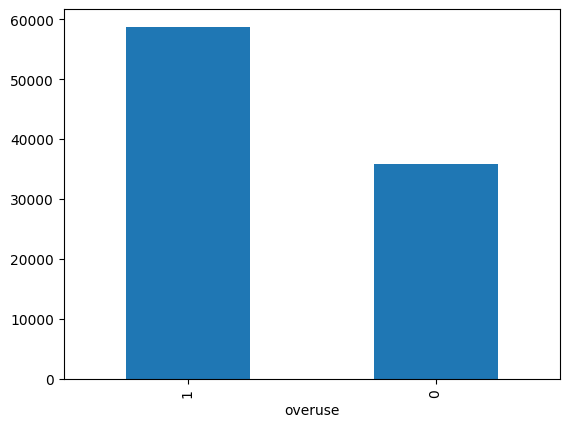

In [42]:
df_cleaned["overuse"].value_counts().plot(kind="bar")

In [43]:
df_cleaned.groupby('overuse')['electricity_bill'].mean()

overuse
0     50.501480
1    130.797994
Name: electricity_bill, dtype: float64

<Axes: xlabel='overuse'>

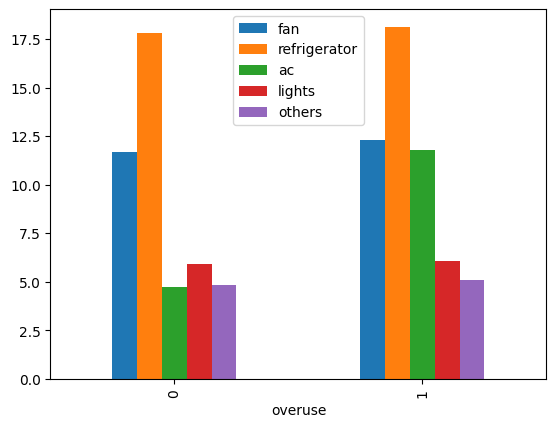

In [44]:
df_cleaned.groupby('overuse')[['fan','refrigerator','ac','lights','others']].mean().plot(kind='bar')


<Axes: xlabel='state', ylabel='Electricity Bill'>

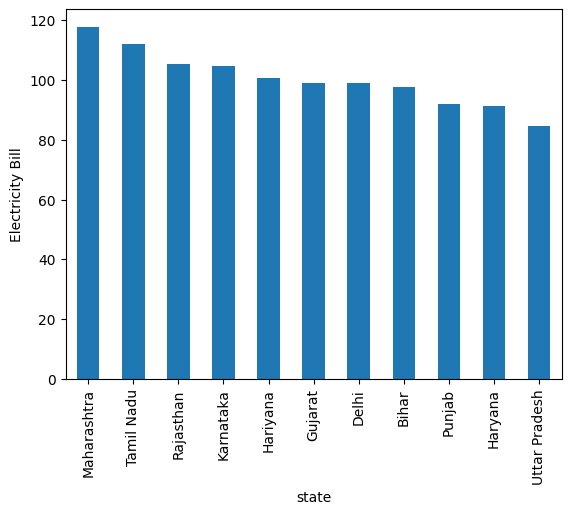

In [45]:
plt.xlabel("State")
plt.ylabel("Electricity Bill")
df_cleaned.groupby("state")["electricity_bill"].mean().sort_values(ascending=False).plot(kind="bar")

<Axes: xlabel='Appliances', ylabel='Number of hours per day'>

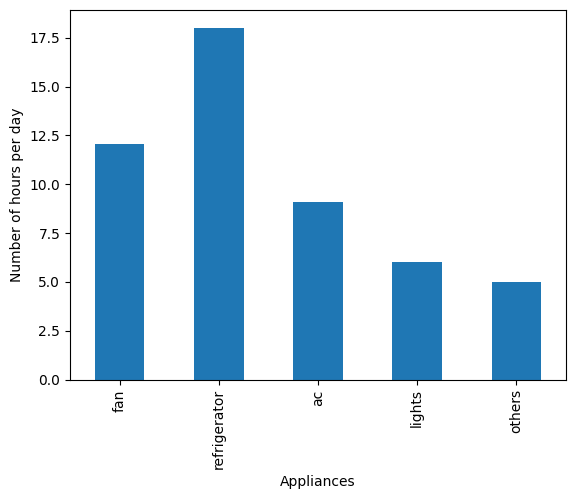

In [46]:
plt.xlabel("Appliances")
plt.ylabel("Number of hours per day")
df_cleaned[["fan",	"refrigerator",	"ac",	"lights",	"others"	]].mean().plot(kind="bar")

<Axes: >

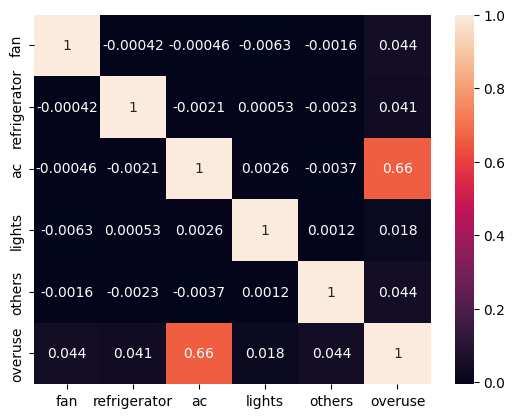

In [47]:
sns.heatmap(data= df_cleaned[["fan",	"refrigerator",	"ac",	"lights",	"others"	, "overuse"]].corr(), annot=True, )

In [48]:
del col

In [49]:
df_cleaned

,fan,refrigerator,ac,lights,others,state,electricity_company,electricity_bill,overuse
0,3.7,19.9,17.4,3.6,0.8,Gujarat,PGVCL,119.48,1
1,19.2,13.1,7.4,9.0,5.0,Maharashtra,MSEDCL,84.65,1
3,6.1,16.6,2.8,3.6,6.1,Karnataka,BESCOM,30.15,0
4,10.3,15.4,3.3,3.1,1.8,Gujarat,UGVCL,32.80,0
5,7.4,15.3,11.0,11.5,8.7,Bihar,SBPDCL,101.08,1
...,...,...,...,...,...,...,...,...,...
99995,0.7,16.9,4.6,10.4,7.2,Karnataka,MESCOM,58.78,0
99996,22.3,17.0,2.8,4.5,3.4,Maharashtra,Tata Power Mumbai,85.62,1
99997,6.6,22.9,7.8,8.4,6.1,Haryana,DHBVN,101.96,1
99998,0.5,18.2,0.5,4.1,4.7,Maharashtra,MSEDCL,48.45,0


In [50]:
df_cleaned.drop(columns="electricity_bill" , inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1017807990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns="electricity_bill" , inplace=True)


In [51]:
df_cleaned

,fan,refrigerator,ac,lights,others,state,electricity_company,overuse
0,3.7,19.9,17.4,3.6,0.8,Gujarat,PGVCL,1
1,19.2,13.1,7.4,9.0,5.0,Maharashtra,MSEDCL,1
3,6.1,16.6,2.8,3.6,6.1,Karnataka,BESCOM,0
4,10.3,15.4,3.3,3.1,1.8,Gujarat,UGVCL,0
5,7.4,15.3,11.0,11.5,8.7,Bihar,SBPDCL,1
...,...,...,...,...,...,...,...,...
99995,0.7,16.9,4.6,10.4,7.2,Karnataka,MESCOM,0
99996,22.3,17.0,2.8,4.5,3.4,Maharashtra,Tata Power Mumbai,1
99997,6.6,22.9,7.8,8.4,6.1,Haryana,DHBVN,1
99998,0.5,18.2,0.5,4.1,4.7,Maharashtra,MSEDCL,0


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x = df_cleaned.drop(columns=["overuse"])
y = df_cleaned["overuse"]

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x , y , random_state=42 , stratify=y , test_size=0.2)

In [55]:
x_train.shape

(75675, 7)

In [56]:
x_test.shape

(18919, 7)

In [57]:
y_train.shape

(75675,)

In [58]:
y_test.shape

(18919,)

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [60]:
processor = ColumnTransformer(transformers= [("scaling" , StandardScaler(), ["fan",	"refrigerator",	"ac",	"lights",	"others"	]),
                                            ("ohe" , OneHotEncoder(handle_unknown="ignore", sparse_output=False) ,["state"	, "electricity_company"] )],
                              remainder= "passthrough")

In [61]:
xtrainfinal = processor.fit_transform(x_train)

In [62]:
xtestfinal = processor.transform(x_test)

In [63]:
xtrainfinal

array([[-1.240617  , -1.32616538,  0.68631986, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.7148981 , -1.64159271, -0.38456266, ...,  0.        ,
         0.        ,  0.        ],
       [-0.45827477,  0.76712508,  0.89667179, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.36719044,  0.79580029, -0.7670207 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.45445784,  0.73844987,  0.70544276, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57036039,  1.65605665,  0.74368857, ...,  0.        ,
         0.        ,  0.        ]])

In [64]:
xtestfinal

array([[ 1.12089752,  1.65605665,  0.57158245, ...,  0.        ,
         0.        ,  0.        ],
       [-1.09573881, -0.23650733,  0.0935099 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.49792129,  0.42302254,  0.36123053, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.58484821,  0.76712508, -1.11123294, ...,  0.        ,
         0.        ,  0.        ],
       [-0.18300621,  1.36930453, -0.7287749 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.6173003 ,  1.16857805,  0.22737021, ...,  0.        ,
         0.        ,  0.        ]])

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
logr = LogisticRegression(
    C=1.0,
    class_weight="balanced",
    max_iter=1000,
    random_state=42
)

In [67]:
logr.fit(xtrainfinal, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [68]:
logr.score(xtestfinal, y_test)

0.835879274803108

In [69]:
logr.score(xtrainfinal, y_train)

0.8359563924677899

In [70]:
from sklearn.metrics import roc_auc_score
logy_prob = logr.predict_proba(xtestfinal)[:, 1]
roc_auc_score(y_test, logy_prob)


0.9125641785109054

In [71]:
logy_probb = logr.predict_proba(xtrainfinal)[:, 1]
roc_auc_score(y_train, logy_probb)

0.9115209942681186

In [72]:
from sklearn.metrics import classification_report

logy_pred = logr.predict(xtestfinal)
print(classification_report(y_test, logy_pred))


              precision    recall  f1-score   support

           0       0.75      0.85      0.80      7169
           1       0.90      0.82      0.86     11750

    accuracy                           0.84     18919
   macro avg       0.83      0.84      0.83     18919
weighted avg       0.84      0.84      0.84     18919



In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=5,
    min_samples_split=10,
    random_state=42,
    n_jobs=-1
)


In [75]:
rf.fit(xtrainfinal, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [76]:
rf.score(xtrainfinal, y_train)

0.8500561612157251

In [77]:
rf.score(xtestfinal, y_test)

0.8414821079338232

In [78]:
rf_prob = rf.predict_proba(xtrainfinal)[:,1]
roc_auc_score(y_train, rf_prob)

0.9363132779313286

In [79]:
rf_probb = rf.predict_proba(xtestfinal)[:,1]
roc_auc_score(y_test, rf_probb)

0.9258041983362171

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

rf_preds = rf.predict(xtestfinal)

print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      7169
           1       0.88      0.86      0.87     11750

    accuracy                           0.84     18919
   macro avg       0.83      0.84      0.83     18919
weighted avg       0.84      0.84      0.84     18919



In [81]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('preprocessor', processor),
    ('classifier', rf)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, x, y, cv=cv, scoring='roc_auc', n_jobs=-1)

print(scores)
print(scores.mean(), scores.std())

[0.92455038 0.92675962 0.92608283 0.9223581  0.92182239]
0.9243146654789347 0.0019595612223764435


In [82]:
#  do deployment

In [83]:
pipeline.predict(x_test.iloc[:2])


array([1, 1])

In [84]:
sample = x_test.iloc[[0]]
pipeline.predict(sample)
pipeline.predict_proba(sample)

array([[0.13188182, 0.86811818]])

In [85]:
proba = pipeline.predict_proba(x_test.iloc[:1])[0][1]

if proba > 0.5:
    result = "⚠️ You will be OVERUSING electricity this month"
else:
    result = "✅ You will NOT be overusing electricity this month"

proba, result

(0.8681181771290903, '⚠️ You will be OVERUSING electricity this month')

In [97]:
import pickle

with open("electricity_overuse_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)